To run this example locally, [install Ploomber](https://docs.ploomber.io/en/latest/get-started/quick-start.html) and execute: `ploomber examples -n templates/ml-basic`

[![binder-logo](https://raw.githubusercontent.com/ploomber/projects/master/_static/open-in-jupyterlab.svg)](https://binder.ploomber.io/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Ftemplates/ml-basic%252FREADME.ipynb%26branch%3Dmaster)

Found an issue? [Let us know.](https://github.com/ploomber/projects/issues/new?title=templates/ml-basic%20issue)

Have questions? [Ask us anything on Slack.](https://ploomber.io/community/)


# Basic ML project

<!-- start description -->
Download data, clean it, generate features and train a model.
<!-- end description -->

## Description

Let's take a look at the `pipeline.yaml`:

```yaml
# Content of pipeline.yaml
tasks:
    # tasks.get, features and join are python functions
  - source: tasks.get
    product: output/get.parquet

  - source: tasks.features
    product: output/features.parquet

  - source: tasks.join
    product: output/join.parquet

    # fit.py is a script (that you can open as notebook in Jupyter)
  - source: fit.py
    name: fit
    product:
        # this output notebook is the model's evaluation report
        nb: output/nb.html
        model: output/model.pickle

    # optional config to hide the code in the output/nb.html report
    nbconvert_export_kwargs:
      exclude_input: True
```

Note that the first three tasks as Python functions, while the last one is a
script.

Generate the plot:

In [1]:
%%bash
ploomber plot

Loading pipeline...
Plot saved at: pipeline.png


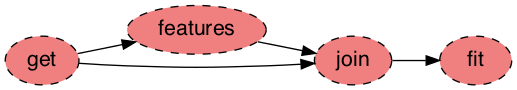

In [2]:
# If using jupyter, you can show the plot with this code:
from IPython.display import Image
Image(filename='pipeline.png')
# otherwise open the pipeline.png file directly

# NOTE: ploomber plot will generate a pipeline.html (not .png) file if
# pygraphviz is missing. In such case, open the file to view the pipeline plot

## Build pipeline

In [3]:
%%bash
ploomber build

Loading pipeline...
name      Ran?      Elapsed (s)    Percentage
--------  ------  -------------  ------------
get       True         0.017875      0.362006
features  True         0.033936      0.687275
join      True         0.03345       0.677433
fit       True         4.8525       98.2733


/Users/Edu/dev/ploomber/src/ploomber/cli/cloud.py:165: UserWarning: Issue: Non cloud users can monitor up to 2 pipelines simultaneously
  warnings.warn(content)
Building task 'fit': 100%|██████████| 4/4 [00:15<00:00,  3.99s/it]
/Users/Edu/dev/ploomber/src/ploomber/cli/cloud.py:165: UserWarning: Issue: Non cloud users can monitor up to 2 pipelines simultaneously
  warnings.warn(content)


Since Ploomber executes scripts as notebooks by default, `fit.py` will
generate a model report at [output/nb.ipynb](output/nb.ipynb) with evaluation
charts.

## Interacting with the pipeline

The command-line interface is a convenient way to interact with your
pipeline. Try this in a terminal:

~~~bash
ploomber interact
~~~